In [62]:
import matplotlib as mpl

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
import seaborn as sns

In [122]:
%matplotlib inline

In [123]:
plt.style.use('seaborn-whitegrid')

# Line styles:

In [119]:
x = np.linspace(0,10,100)

In [120]:
fig = plt.figure()

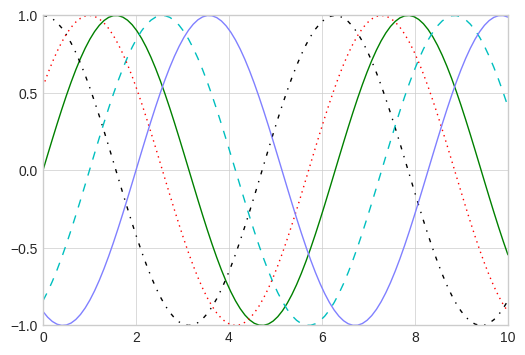

In [124]:
plt.plot(x,np.sin(x),'-g',)
plt.plot(x,np.cos(x),'-.k')
plt.plot(x,np.sin(x-1),'--c')
plt.plot(x,np.cos(x-1),':r');
plt.plot(x,np.sin(x-2),color = (0.5,0.5,1.0));

In [125]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [126]:
plt.savefig('my_plot.png')

# Axes limit

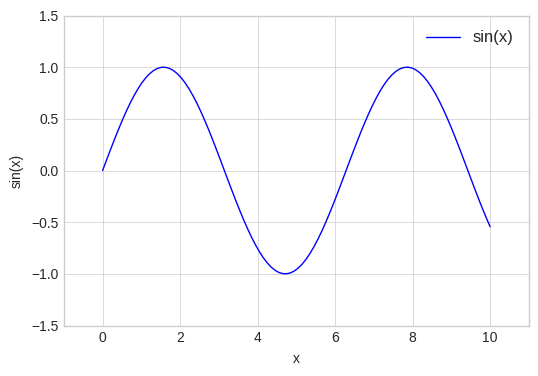

In [127]:
plt.plot(x,np.sin(x),label = 'sin(x)')
plt.xlim(-1,11)
plt.ylim(-1.5,1.5)
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.legend();

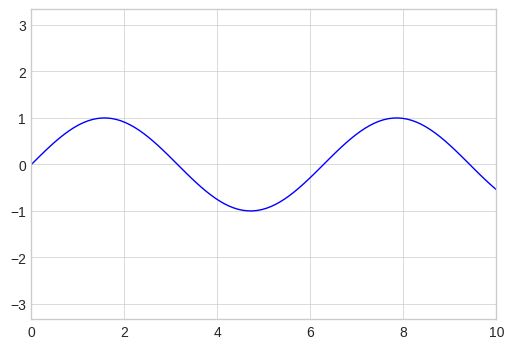

In [128]:
plt.plot(x,np.sin(x))
plt.axis('equal');

# Scatterplot:

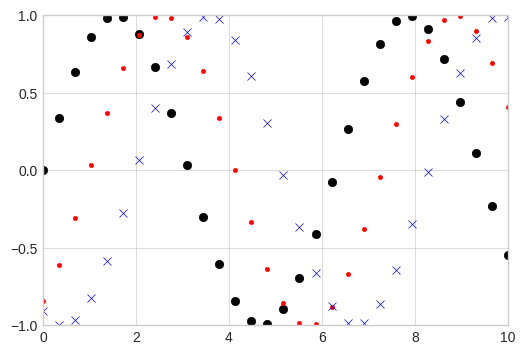

In [129]:
x = np.linspace(0,10,30)
y = np.sin(x)
plt.plot(x,y,'ok')
plt.plot(x,np.sin(x-1),'.r')
plt.plot(x,np.sin(x-2),'xb');

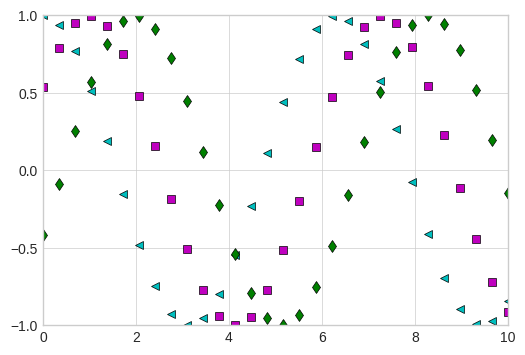

In [130]:
plt.plot(x,np.cos(x),'<c')
plt.plot(x,np.cos(x-1),'sm')
plt.plot(x,np.cos(x-2),'dg');

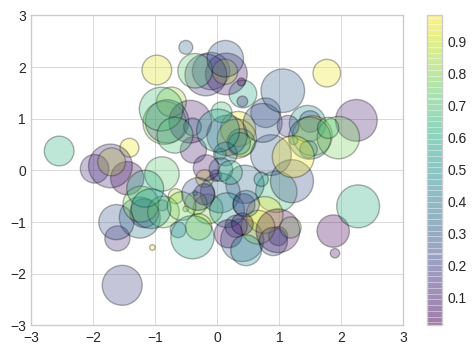

In [131]:
rng = np.random.RandomState(0) 
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
#properties of each point controled individually
plt.scatter(x,y,c = colors,s = sizes,alpha = 0.3,cmap='viridis')
plt.colorbar();

In [91]:
iris = sns.load_dataset("iris")

In [92]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


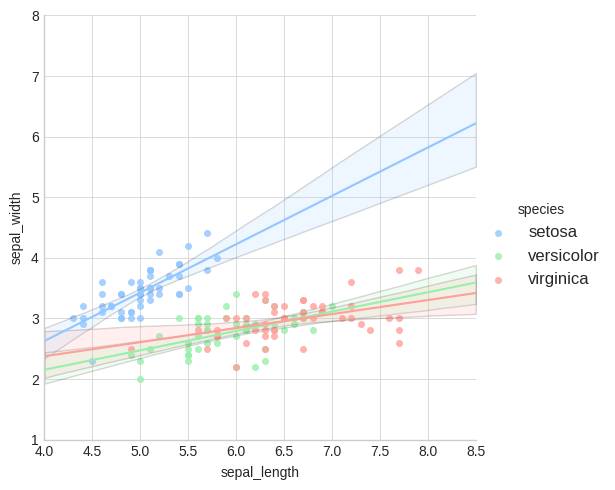

In [132]:
with plt.style.context('seaborn-pastel'):
    sns.lmplot(x="sepal_length",y="sepal_width",data = iris,hue = 'species',fit_reg=True);

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


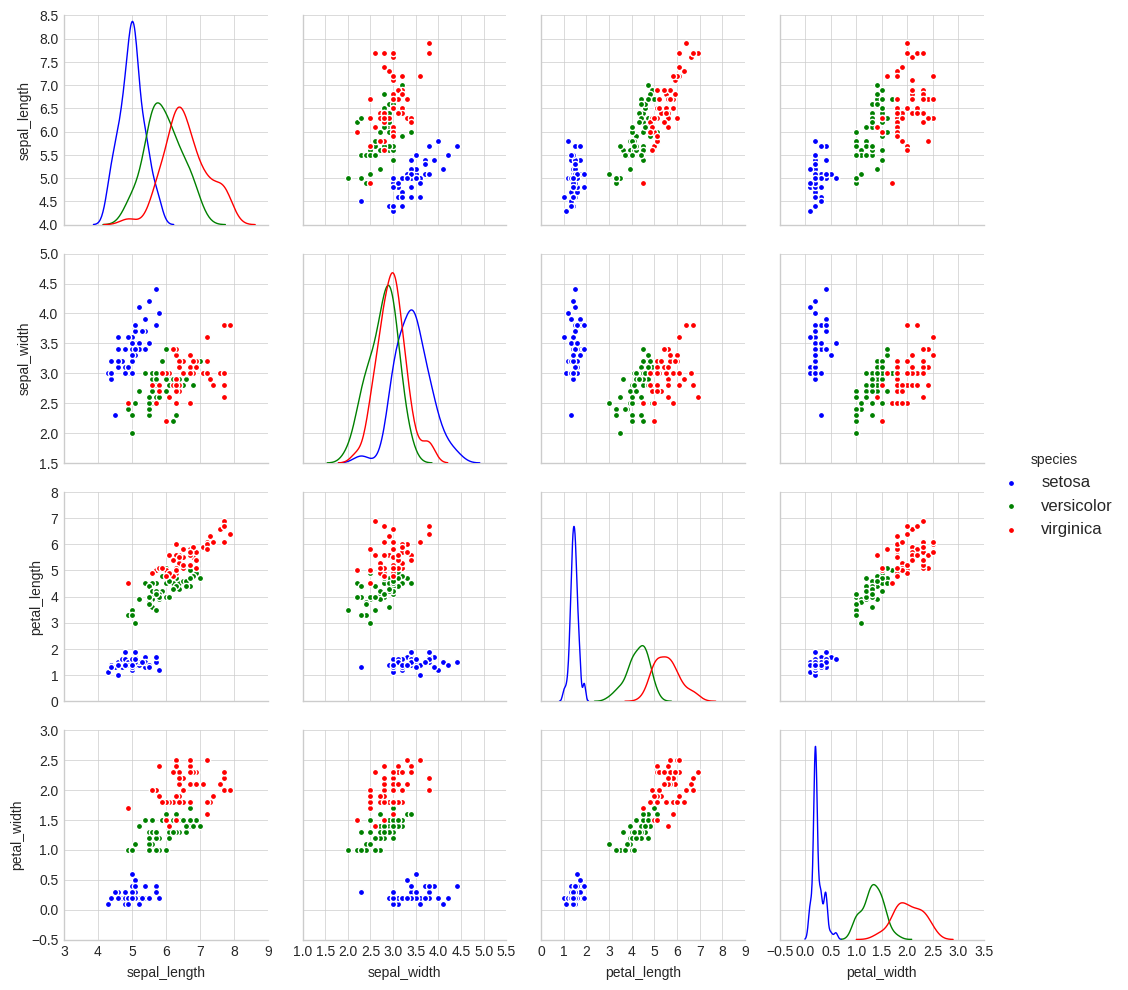

In [133]:
sns.pairplot(iris, diag_kind="kde",vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], hue="species")


# Errorbars:

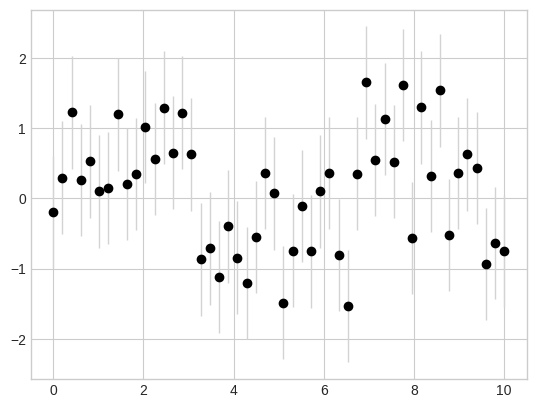

In [94]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x,y,yerr=dy,fmt='o',color = 'black',ecolor='lightgray',elinewidth=1,capsize=0);

# 3D functions:

In [127]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X,Y = np.meshgrid(x,y)
Z = np.sin(X) ** 10 + np.cos(10 + Y * X) * np.cos(X)

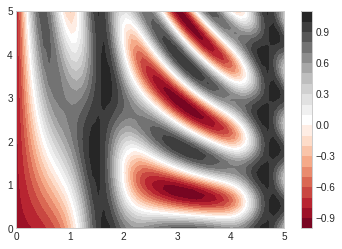

In [130]:
plt.contourf(X,Y,Z,20,cmap='RdGy')
plt.colorbar();

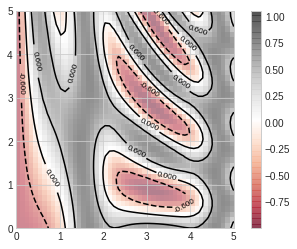

In [132]:
contours = plt.contour(X,Y,Z,3,colors = 'black')
plt.clabel(contours,inline = True,fontsize = 8)
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.5)
plt.colorbar();

# Histogram:

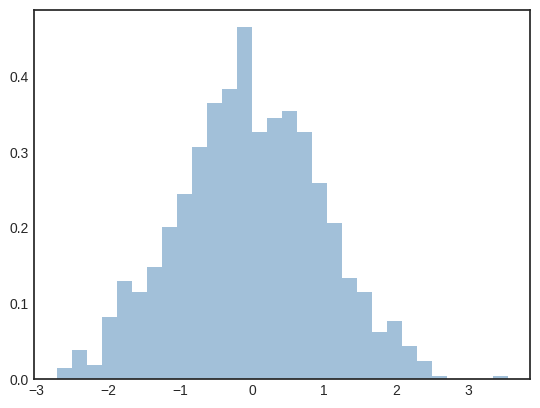

In [95]:
data = np.random.randn(1000)
plt.style.use('seaborn-white')
plt.hist(data,bins = 30,normed = True,alpha = 0.5,histtype='stepfilled',color = 'steelblue',edgecolor = 'none');

# Discrete colorbars:

In [99]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

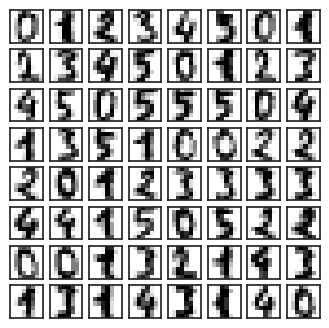

In [100]:
fig,ax = plt.subplots(8,8,figsize=(4,4))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap='binary')
    axi.set(xticks=[],yticks=[])

In [102]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
projection = iso.fit_transform(digits.data)

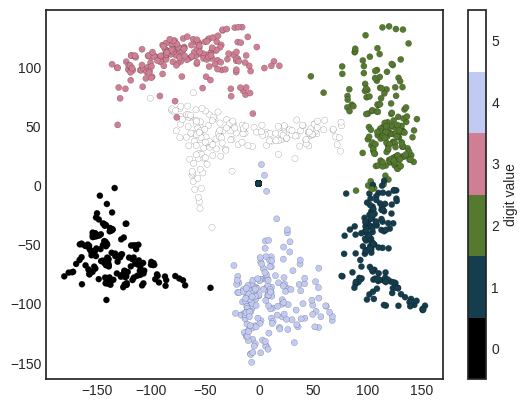

In [103]:
plt.scatter(projection[:,0],projection[:,1],lw = 0.1,c=digits.target,edgecolors='black',s = 20,
            cmap=plt.cm.get_cmap('cubehelix',6))
plt.colorbar(ticks = range(6),label = 'digit value')
plt.clim(-0.5,5.5)

# GridSpec:

In [178]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

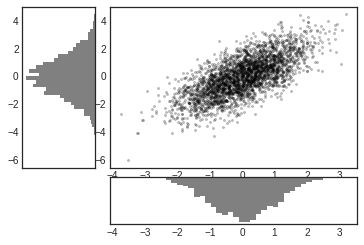

In [187]:
fig = plt.figure()
grid = plt.GridSpec(4,4,hspace = 0.2,wspace=0.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0],xticklabels = [],sharey = main_ax)
x_hist = fig.add_subplot(grid[-1,1:],yticklabels = [],sharex = main_ax)

main_ax.plot(x,y,'ok',markersize = 2,alpha = 0.2)

x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color='gray')
x_hist.invert_yaxis()
y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()

# Annotation:

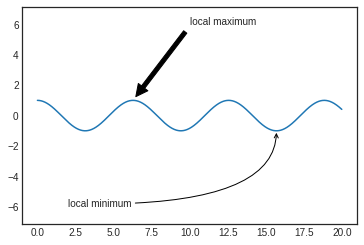

In [199]:
plt.style.use('seaborn-white')
fig,ax = plt.subplots()
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal');

ax.annotate('local maximum',xy=(6.28,1),xytext=(10,6),arrowprops=dict(facecolor='black',shrink=0.05))
ax.annotate('local minimum',xy=(5*np.pi,-1),xytext=(2,-6),arrowprops=dict(arrowstyle="->",
            connectionstyle="angle3,angleA=0,angleB=-90"));

# Stylesheet:

In [134]:
def hist_and_lines():
    fig,ax = plt.subplots(1,2,figsize=(11,4))
    ax[0].hist(np.random.randn(1000),edgecolor='white')
    x = np.linspace(0,10,40)
    ax[1].plot(x,(x+1)**2)
    ax[1].plot(x,(3 * x)**2)
    ax[1].plot(x,2 * (x + 3)**2);
    ax[1].plot(x,3 * (x + 3)**2);
    ax[1].legend(['(x+1)^2','(3x)^2','2(x+3)^2','3(x+3)^2'])

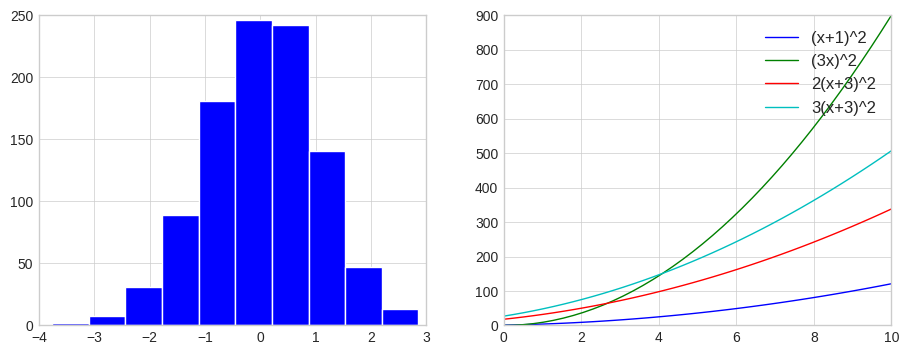

In [135]:
with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()

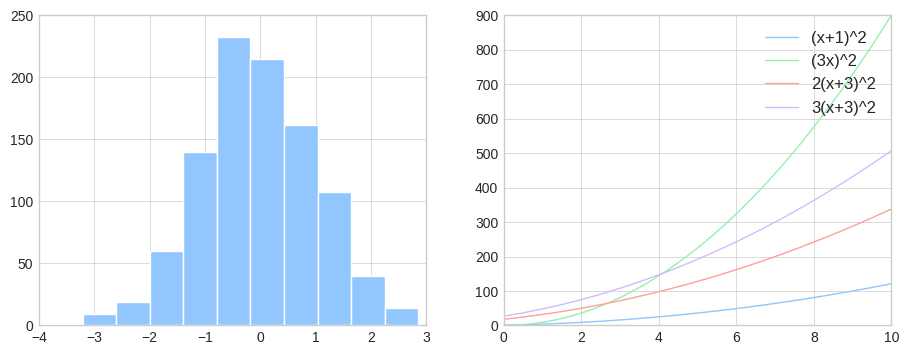

In [136]:
with plt.style.context('seaborn-pastel'):
    hist_and_lines()

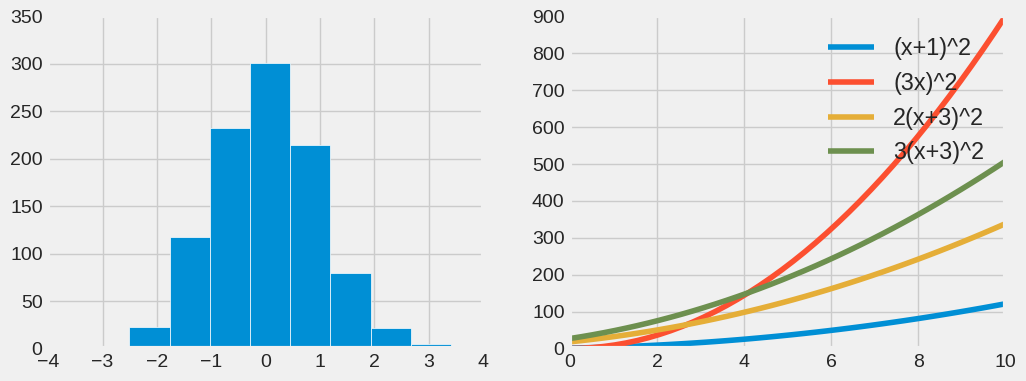

In [137]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

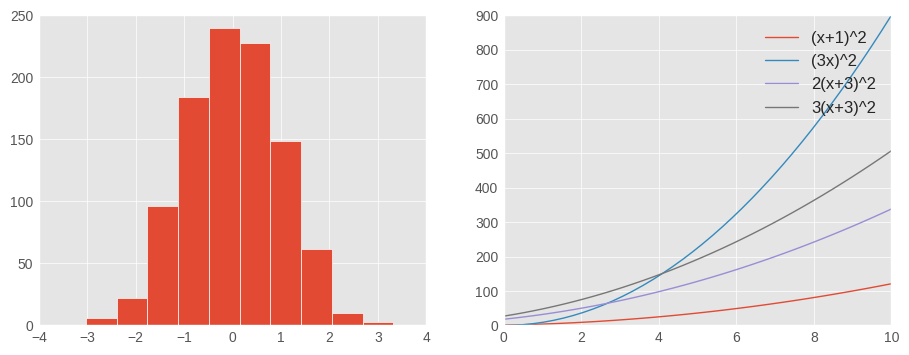

In [138]:
with plt.style.context('ggplot'):
    hist_and_lines()

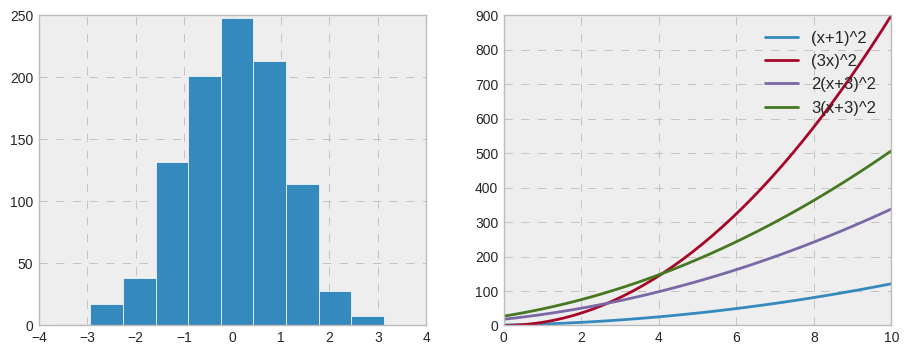

In [139]:
with plt.style.context('bmh'):
    hist_and_lines()

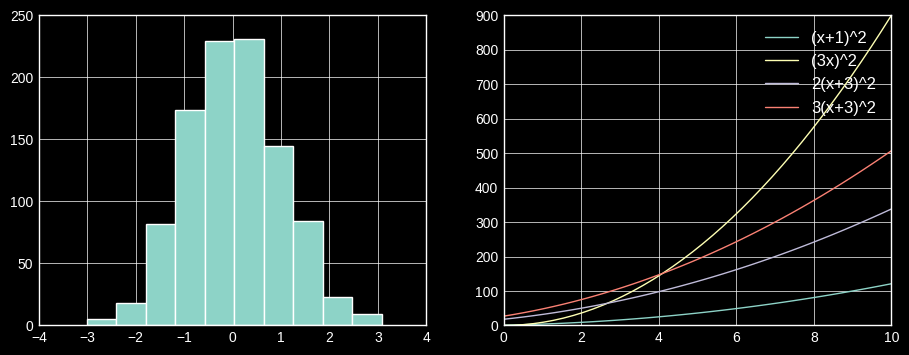

In [140]:
with plt.style.context('dark_background'):
    hist_and_lines()

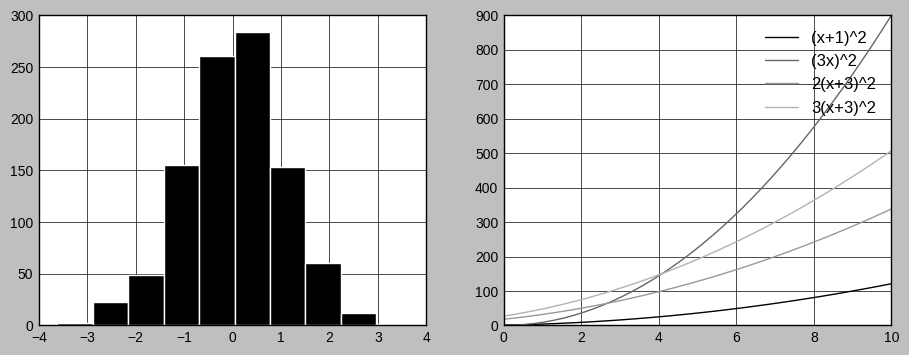

In [141]:
with plt.style.context('grayscale'):
    hist_and_lines()

## Heat map:

In [115]:
flights=sns.load_dataset("flights")

In [116]:
flights.pivot("month", "year", "passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


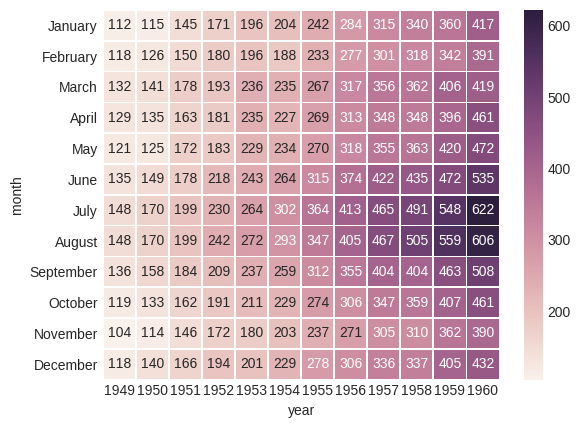

In [117]:
flights_pivot = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_pivot,annot=True, fmt="d", linewidths=0.5)#, annot=True, fmt="d", linewidths=0.5)
plt.show();